In [ ]:
#Hello. If these results are messy maybe you need to coarsen to 5m resolution? What was Simon even using?

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

# Metrics vs InSAR displacement

In [28]:
displ = rasterio.open('velocity_clip.tif')
darea = rasterio.open('dinf.tif')
curve = rasterio.open('curve.tif')
aspect = rasterio.open('aspect.tif')
slope = rasterio.open('slope.tif')

msk_d = darea.read_masks()
darea_data = darea.read(1, masked=True)
curve_data = curve.read(1, masked=True)
disp_data = displ.read(1, masked=True)
asp_data = aspect.read(1, masked=True)
slope_data = slope.read(1, masked=True)

darea_array=darea_data.flatten()
curve_array=curve_data.flatten()
asp_array=asp_data.flatten()
disp_array=disp_data.flatten()
slope_array=slope_data.flatten()

## View rasters

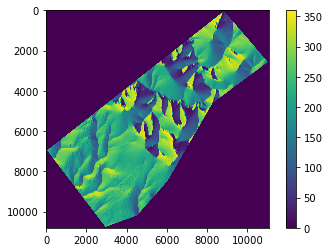

In [31]:
plt.imshow(aspect.read(1), vmin=0, vmax=360)
plt.colorbar()
plt.show()

## do analyses


In [3]:
northa = (asp_array < 0 + 45) 
northb = (asp_array > 360 - 45) 
north = (asp_array < 0 + 45)  + (asp_array > 360 - 45) 
south = (asp_array > 90+45) & (asp_array < 270-45)
east = (asp_array > 0 + 45) & (asp_array < 90+45)
west = (asp_array < 360-45) & (asp_array > 180+45)


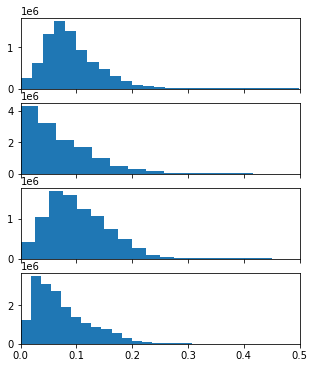

In [37]:
fig, ax = plt.subplots(4,1,figsize=(5,6),sharex=True)
for i,aspect in enumerate([north, south, east, west]):
    ax[i].hist(slope_array[aspect],bins=50)
    ax[i].set_xlim(0,0.5)
 

In [107]:
#Bins for area
a1=10.**(np.arange(1, 7)) 
a2 = np.arange(1,10,1)
bin_edges=np.outer(a1, a2).flatten()

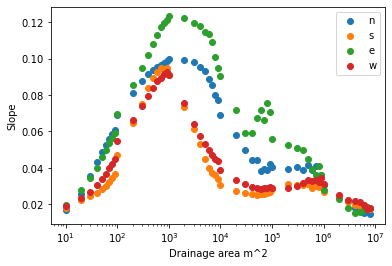

In [43]:
labels = ['n','s','e','w']
for i,aspect in enumerate([north, south, east, west]):
    mean_stat = binned_statistic(darea_array[aspect],slope_array[aspect],
                            statistic='median',
                            bins=bin_edges)

    std_stat = binned_statistic(darea_array[aspect],slope_array[aspect],
                            statistic='std',
                            bins=bin_edges)
    plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic, label=labels[i])
plt.xscale('log')
plt.xlabel('Drainage area m^2')
plt.ylabel('Slope')
plt.legend()

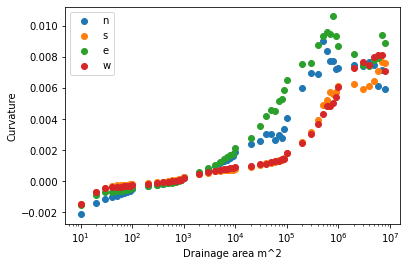

In [44]:
for i,aspect in enumerate([north, south, east, west]):
    mean_stat = binned_statistic(darea_array[aspect],curve_array[aspect],
                            statistic='median',
                            bins=bin_edges)

    std_stat = binned_statistic(darea_array[aspect],curve_array[aspect],
                            statistic='std',
                            bins=bin_edges)
    plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic, label=labels[i])
plt.xlabel('Drainage area m^2')
plt.ylabel('Curvature')
plt.xscale('log')
plt.legend()

C:\Users\joanm\Anaconda3\lib\site-packages\scipy\stats\_binned_statistic.py:569: RuntimeWarning: overflow encountered in square
  (flatsum[a] / flatcount[a]) ** 2)


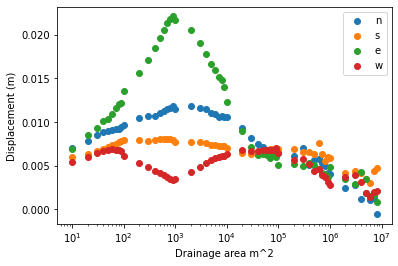

In [106]:
fig, ax = plt.subplots()
for i,aspect in enumerate([north, south, east, west]):
    mean_stat = binned_statistic(darea_array[aspect],disp_array[aspect],
                            statistic='median',
                            bins=bin_edges)

    std_stat = binned_statistic(darea_array[aspect],disp_array[aspect],
                            statistic='std',
                            bins=bin_edges)
    ax.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic, label=labels[i])
    ax.set_xscale('log')
plt.xlabel('Drainage area m^2')
plt.ylabel('Displacement (m)')
plt.legend()

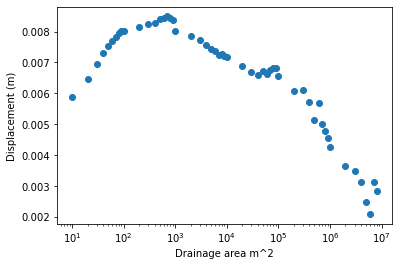

In [112]:
mean_stat = binned_statistic(darea_array,disp_array,
                            statistic='median',
                            bins=bin_edges)

std_stat = binned_statistic(darea_array,disp_array,
                            statistic='std',
                            bins=bin_edges)
plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic)
#plt.errorbar(mean_stat.bin_edges[1:],mean_stat.statistic,yerr=std_stat.statistic,fmt='o')
plt.xlabel('Drainage area m^2')
plt.ylabel('Displacement (m)')
plt.xscale('log')
plt.show()

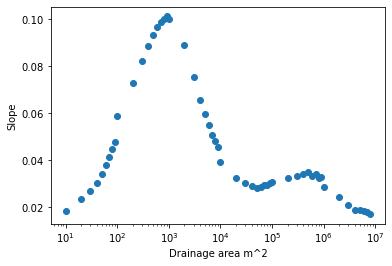

In [108]:
mean_stat = binned_statistic(darea_array,slope_array,
                            statistic='median',
                            bins=bin_edges)

std_stat = binned_statistic(darea_array,slope_array,
                            statistic='std',
                            bins=bin_edges)
plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic)
plt.xlabel('Drainage area m^2')
plt.ylabel('Slope')
plt.xscale('log')
plt.show()

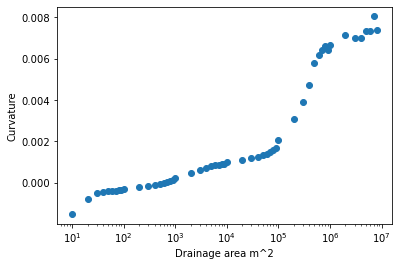

In [109]:
mean_stat = binned_statistic(darea_array,curve_array,
                            statistic='median',
                            bins=bin_edges)

std_stat = binned_statistic(darea_array,curve_array,
                            statistic='std',
                            bins=bin_edges)
plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic)
plt.xlabel('Drainage area m^2')
plt.ylabel('Curvature')
plt.xscale('log')
plt.show()

In [ ]:
mean_stat = binned_statistic(darea_array,curve_array,
                            statistic='median',
                            bins=bin_edges)
plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic)
plt.xlabel('Drainage area m^2')
plt.ylabel('curvature')
plt.xscale('log')
plt.show()

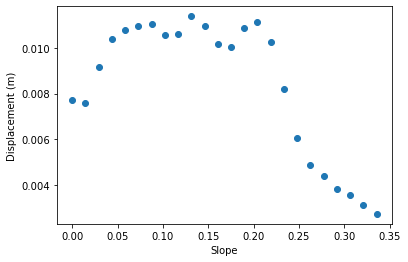

In [110]:
mean_stat = binned_statistic(slope_array,disp_array,
                            statistic='mean',
                            bins=np.linspace(0,0.35,25))
std_stat = binned_statistic(slope_array,disp_array,
                            statistic='std',
                            bins=np.linspace(0,0.35,25))
plt.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic)
#plt.errorbar(mean_stat.bin_edges[1:],mean_stat.statistic,yerr=std_stat.statistic,fmt='o')
plt.xlabel('Slope')
plt.ylabel('Displacement (m)')
plt.show()

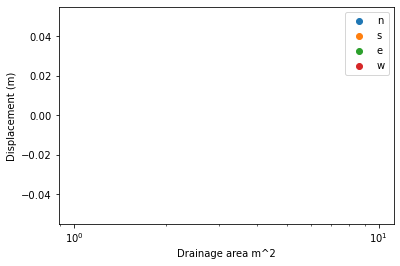

In [51]:
labels = ['n','s','e','w']
fig, ax = plt.subplots()
for i,aspect in enumerate([north, south, east, west]):
    mean_stat = binned_statistic(slope_array[aspect],disp_array[aspect],
                            statistic='median',
                            bins=bin_edges)

    std_stat = binned_statistic(slope_array[aspect],disp_array[aspect],
                            statistic='std',
                            bins=bin_edges)
    ax.scatter(mean_stat.bin_edges[:-1],mean_stat.statistic, label=labels[i])
    ax.set_xscale('log')
plt.xlabel('Drainage area m^2')
plt.ylabel('Displacement (m)')
plt.legend()

